<br><br><span style='font-size:50px'>Reading and Discovering the Dataset</span>

<p>Dataset Source: <a href='https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews'>https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews</a></p>

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('IMDB Dataset.csv')

In [4]:
data.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [22]:
data.sample(10)

,review,sentiment
48937,"""In the Mood for Love"" a teasing allegory of l...",positive
3340,"I've always been a fan of Jackass, as well as ...",positive
28383,I suppose if you like pure action... you'll fi...,negative
11595,This is a very moving picture about 3 forty-so...,positive
6985,Let's see where to begin... bad acting; I'm no...,negative
11819,Let's set one thing straight: this movie does ...,positive
44348,"let me say that i love Adam Sandler, watching ...",positive
16902,<br /><br />Summary: Not worth the film<br /><...,negative
47695,"Once you sit down to see this film "" A Cannon ...",positive
11707,This is the type of film that makes you questi...,negative


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [24]:
data.duplicated().sum()

418

In [ ]:
# duplicated_values = data[data['review'].duplicated()]['review']
# duplicated_values

In [25]:
data = data.drop_duplicates(subset=['review']).reset_index(drop=True)

In [26]:
data['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [27]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

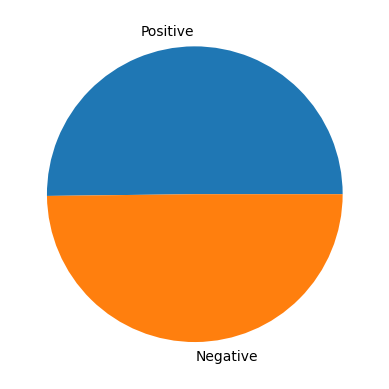

In [29]:
data_dist = [
    len(data[data['sentiment']=='positive']),
    len(data[data['sentiment']=='negative'])
]
labels = ['Positive','Negative']
plt.pie(data_dist, labels = labels)
plt.show

<br><br><span style='font-size:50px'>Data Preprocessing</span>

In [30]:
import re

<br><br><span style='font-size:30px'>Removing HTML Tags</span>

In [31]:
def removeHTML(text):
    text = re.sub(r'<[^>]*>', '', text)
    return(text)

<br><br><span style='font-size:30px'>Removing Stop Words</span>

In [32]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 

In [33]:
def removeStopWords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return(text)

<br><br><span style='font-size:30px'>Text Lemmatizing</span>

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Qassem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
def Lemmatizing(text):
    text = lemmatizer.lemmatize(text)
    return(text)

<br><br><span style='font-size:30px'>Removing Noise</span>

In [36]:
def removeNoise(text):
    text = re.sub(r'[^a-zA-Z\s]+', '', text) # Only keep English letters
    text = re.sub(r'(\w)\1{2,}', r'\1', text)   #Normalize Repeated Letters
    text = re.sub(r'\s{2,}', ' ', text).strip() # Removing extra spaces
    return(text)

<br><br><br><br><span style='font-size:50px'>Adding New Column for the Cleaned Text</span>

In [37]:
CleanedText = []

In [38]:
for i in range(len(data)):
    text = data.review[i]
    text = removeHTML(text)
    text = removeStopWords(text)
    text = Lemmatizing(text)
    text = removeNoise(text)
    CleanedText.append(text)

In [39]:
data['CleanedText'] = CleanedText

In [15]:
#data = data.drop(['CleanedText'],axis=1)

In [40]:
data.head()

,review,sentiment,CleanedText
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [46]:
data.sample(20)

,review,sentiment,CleanedText
2222,Fabulous film! Rented the DVD recently and was...,positive,fabulous film rented dvd recently floored stun...
34033,"Hello again, I have been thinking about this m...",positive,hello again thinking movie life saw years old ...
47616,"I saw this on TCM recently and, through the IM...",positive,saw tcm recently and imdb found seven crime do...
35651,Hard to believe that director Barbet Schroeder...,negative,hard believe director barbet schroeder majesti...
38027,If this film was just outrageously poor would ...,negative,film outrageously poor would fine problem many...
4992,An interesting slasher film with multiple susp...,negative,interesting slasher film multiple suspectsincl...
48829,Formulaic to the max. Neither title reflects t...,negative,formulaic max neither title reflects serials a...
13304,"The acting is pretty cheesy, but for the peopl...",positive,acting pretty cheesy people area s detroit are...
28833,I went to see this movie at our college theate...,negative,went see movie college theater thirty years ag...
10543,"A family with dad Louis (Dale Midkiff), mom Ra...",negative,family dad louis dale midkiff mom rachel denis...


<br><br><span style='font-size:50px'>Splitting Data into Training and Testing</span>

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

<br><br><span style='font-size:50px'>Feature Extraction using TF-IDF Vectorizer</span>

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [50]:
X_train = vectorizer.fit_transform(train['CleanedText'])
X_test = vectorizer.transform(test['CleanedText'])

<br><br><span style='font-size:50px'>Model Building & Evaluation</span>

In [51]:
from sklearn.metrics import classification_report,f1_score,accuracy_score

<br><br><span style='font-size:30px'>Multinomial Naive Bayes</span>

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
mnb = MultinomialNB()

mnb.fit(X_train, train['sentiment'])

MultinomialNB()

In [68]:
pred_y_mnb = mnb.predict(X_test)

In [66]:
print('Classification Report:\n')
print(classification_report(test['sentiment'], pred_y_mnb))
print('_'*100)
print('Accuracy:',accuracy_score(test['sentiment'], pred_y_mnb))
print('_'*100)
print('F1 Score:',f1_score(test['sentiment'], pred_y_mnb, average='weighted'))

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4909
    positive       0.87      0.85      0.86      5008

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

____________________________________________________________________________________________________
Accuracy: 0.8557023293334678
____________________________________________________________________________________________________
F1 Score: 0.8556984235435277


<br><br><span style='font-size:30px'>Random Forest</span>

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
rf.fit(X_train, train['sentiment'])

RandomForestClassifier(n_jobs=-1, random_state=0)

In [69]:
pred_y_rf = rf.predict(X_test)

In [70]:
print('Classification Report:\n')
print(classification_report(test['sentiment'], pred_y_rf))
print('_'*100)
print('Accuracy:',accuracy_score(test['sentiment'], pred_y_rf))
print('_'*100)
print('F1 Score:',f1_score(test['sentiment'], pred_y_rf, average='weighted'))

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4909
    positive       0.86      0.85      0.85      5008

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

____________________________________________________________________________________________________
Accuracy: 0.8504588081072905
____________________________________________________________________________________________________
F1 Score: 0.8504625335452527


<br><br><span style='font-size:50px'>Testing the Model</span>

In [71]:
import numpy as np

In [72]:
def test_classifier(clf,input_text):
    input_text = removeHTML(input_text)
    input_text = removeStopWords(input_text)
    input_text = Lemmatizing(input_text)
    input_text = removeNoise(input_text)
    text_2_vec = vectorizer.transform(np.array([input_text]))    

    pred_y = clf.predict(text_2_vec)

    if pred_y == 'positive':
        return ('Positive.')
    else:
        return ('Negative.')

In [73]:
#Trained Classifiers: mnb, rf

In [74]:
input_text = '''Lacking coherence and depth, the 2015 "Fantastic Four" adaptation falters with weak
                characterization and a disjointed plot, failing to capture the essence of its source material.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: "Lacking coherence and depth, the 2015 "Fantastic Four" adaptation falters with weak
                characterization and a disjointed plot, failing to capture the essence of its source material.".
Sentiment: Negative.


In [75]:
input_text = '''A groundbreaking blend of stunning visuals and thrilling storytelling,
                "Jurassic Park" remains a timeless adventure that defined the blockbuster experience.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: "A groundbreaking blend of stunning visuals and thrilling storytelling,
                "Jurassic Park" remains a timeless adventure that defined the blockbuster experience.".
Sentiment: Positive.


In [76]:
input_text = '''An intense, gripping saga showcasing Heath Ledgers mesmerizing performance
                as the Joker. "The Dark Knight" stands as a triumph in the superhero genre, blending action with profound storytelling.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(rf,input_text))

Text: "An intense, gripping saga showcasing Heath Ledgers mesmerizing performance
                as the Joker. "The Dark Knight" stands as a triumph in the superhero genre, blending action with profound storytelling.".
Sentiment: Positive.


In [77]:
input_text = '''A disjointed mess with flashes of potential. "Suicide Squad" suffers from an uneven plot, 
                underdeveloped characters, and tonal inconsistencies that undermine its promising premise.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(rf,input_text))

Text: "A disjointed mess with flashes of potential. "Suicide Squad" suffers from an uneven plot, 
                underdeveloped characters, and tonal inconsistencies that undermine its promising premise.".
Sentiment: Negative.


In [78]:
input_text = '''Revolutionary in both visuals and narrative, "The Matrix" is a mind-bending sci-fi classic
                that redefined action cinema, setting new standards for storytelling and special effects.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(rf,input_text))

Text: "Revolutionary in both visuals and narrative, "The Matrix" is a mind-bending sci-fi classic
                that redefined action cinema, setting new standards for storytelling and special effects.".
Sentiment: Positive.


In [79]:
input_text = '''"Whiplash" is a tour de force that resonates deeply. Its intense narrative, fueled by stellar performances and
                an electrifying soundtrack, makes it an unforgettable cinematic experience.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: ""Whiplash" is a tour de force that resonates deeply. Its intense narrative, fueled by stellar performances and
                an electrifying soundtrack, makes it an unforgettable cinematic experience.".
Sentiment: Positive.


In [80]:
input_text = '''"M. Night Shyamalan's "The Happening" is a misfire, featuring a disjointed plot 
                and cringe-inducing dialogue. Despite a promising premise, it falls flat, lacking both suspense and coherence.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: ""M. Night Shyamalan's "The Happening" is a misfire, featuring a disjointed plot 
                and cringe-inducing dialogue. Despite a promising premise, it falls flat, lacking both suspense and coherence.".
Sentiment: Negative.
